In [216]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
import os
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import seaborn as sns
import modules_TFM as mod
import random as rd

from scipy.optimize import curve_fit
from scipy.stats import binned_statistic_2d
from scipy.stats import binned_statistic

In [3]:
import time
print(' Last revision ', time.asctime())
kdst=pd.read_hdf('C:/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/mitad_archivos_4bar.kdst',key='dst')

kdst

 Last revision  Wed Jan  8 16:45:48 2025


,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,1000000,1.000001e+10,0,0,1,1,350.0,4.768981,24.525940,10000.0,...,12,682.488525,593.765015,5.799992,-76.391440,-236.800076,248.817058,-1.882855,12.114762,13.456392
1,1000001,1.000002e+10,0,0,1,1,300.0,6.461599,16.279964,10000.0,...,12,1247.474976,1085.303101,7.123396,-74.791721,191.354832,205.451876,1.943393,53.883823,17.578513
2,1000002,1.000003e+10,0,0,1,1,275.0,5.255196,17.718275,10000.0,...,7,1319.482178,1147.949463,7.648182,-396.569234,-191.403252,440.343460,-2.691923,12.286431,10.530898
3,1000003,1.000004e+10,0,0,1,1,250.0,5.745650,22.911438,10025.0,...,10,1184.482910,1030.500122,6.930428,435.922420,63.416010,440.511006,0.144462,11.978040,15.545562
4,1000004,1.000005e+10,0,0,1,1,275.0,3.410242,13.019589,10000.0,...,11,1004.481628,873.898926,6.501753,-369.092641,-132.206807,392.056140,-2.797637,158.043427,13.807759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649095,7998995,7.998996e+10,0,0,1,1,125.0,4.917645,12.764097,10000.0,...,10,296.492279,257.948242,3.727004,-406.582358,82.452726,414.858610,2.941511,11.406514,12.815894
3649096,7998996,7.998997e+10,0,0,1,1,250.0,7.866583,29.353226,10000.0,...,11,876.468750,762.527771,6.276387,4.653529,301.868364,301.904231,1.555382,11.274709,14.403565
3649097,7998997,7.998997e+10,0,0,1,1,225.0,7.201917,20.151947,10025.0,...,13,946.460938,823.420959,6.422862,-153.329992,-412.838028,440.392239,-1.926411,76.275140,62.262278
3649098,7998998,7.998999e+10,0,0,1,1,325.0,10.353655,30.296391,10000.0,...,12,1322.456787,1150.537354,7.881156,235.657284,170.933954,291.123293,0.627537,184.426953,86.683606


In [4]:
s2w = kdst['S2w']
s2h = kdst['S2h']
s2e = kdst['S2e']
s2q = kdst['S2q']
s1w = kdst['S1w']
s1h = kdst['S1h']
s1e = kdst['S1e']
DT = kdst['DT']

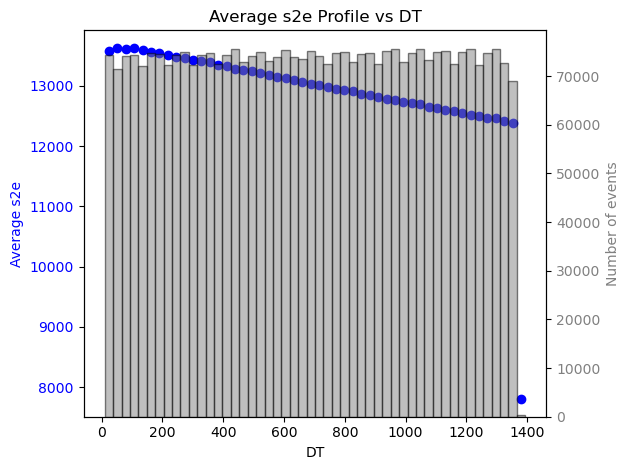

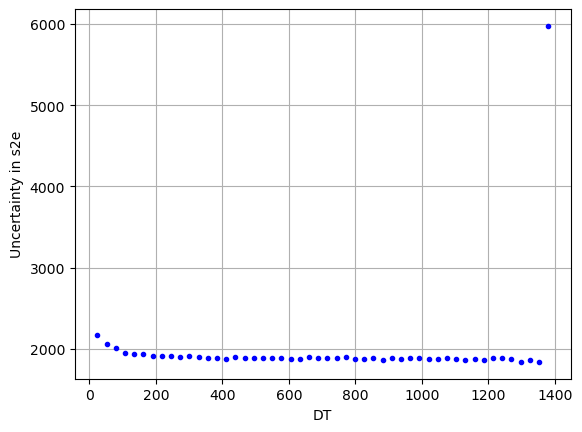

In [8]:
_=mod.profiles(DT, s2e, threshold=10 ,x_label='DT', y_label='s2e',plot=True)

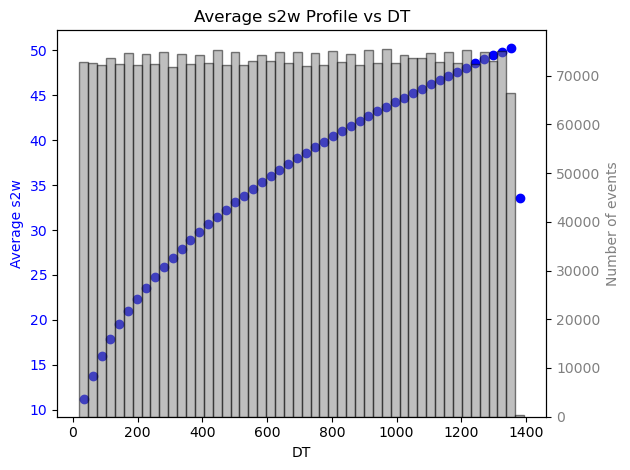

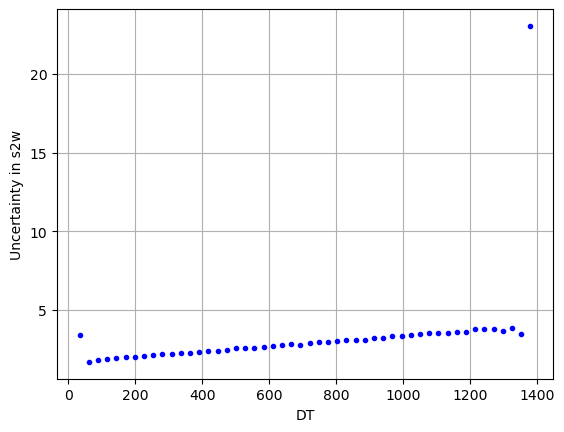

In [10]:
_=mod.profiles(DT, s2w, threshold=20, x_label='DT', y_label='s2w',plot=True)

In [12]:
s2w=np.array([S2w for S2w,dt in zip(s2w,DT) if dt>0 and dt<800])
DT=np.array([dt for dt in DT if dt>0 and dt<800])

(10.0, 800.0)

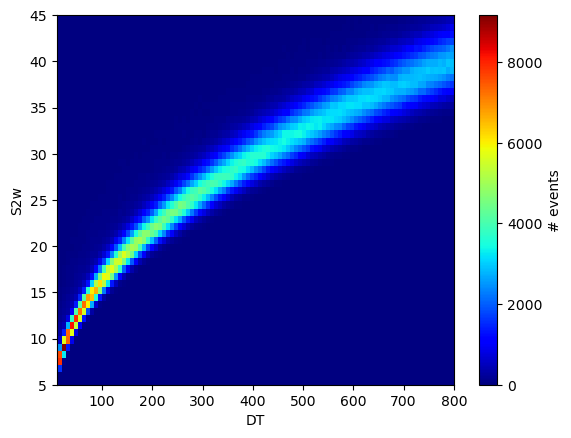

In [13]:
_=plt.hist2d(DT,s2w,bins=100,cmap='jet')
plt.colorbar(label='# events')
plt.xlabel('DT')
plt.ylabel('S2w')
plt.ylim(5,45)
plt.xlim(10,800)

In [14]:
real_data=pd.read_hdf('C:/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/ldc1_merged.h5')

In [15]:
real_data

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,2,1.734609e+09,0,0,67,1,75.0,1.442733,3.200199,25775.0,...,11,1576.722290,1576.722290,1.862032,480.139917,24.371127,480.758039,0.050715,10.012467,11.907358
1,2,1.734609e+09,1,0,67,1,100.0,1.110342,2.748725,57275.0,...,11,1545.222290,1545.222290,1.862032,480.139917,24.371127,480.758039,0.050715,10.012467,11.907358
2,2,1.734609e+09,2,0,67,1,100.0,0.762607,2.480050,57725.0,...,11,1544.772339,1544.772339,1.862032,480.139917,24.371127,480.758039,0.050715,10.012467,11.907358
3,2,1.734609e+09,3,0,67,1,100.0,0.572857,1.273665,58325.0,...,11,1544.172363,1544.172363,1.862032,480.139917,24.371127,480.758039,0.050715,10.012467,11.907358
4,2,1.734609e+09,4,0,67,1,100.0,0.772437,2.695194,67050.0,...,11,1535.447266,1535.447266,1.862032,480.139917,24.371127,480.758039,0.050715,10.012467,11.907358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993896,3444016,1.734690e+09,4,0,9,1,75.0,1.891147,4.515804,969550.0,...,10,632.961182,632.961182,4.568292,52.168112,-407.965165,411.287111,-1.443613,12.053578,12.667579
5993897,3444016,1.734690e+09,5,0,9,1,325.0,2.389486,16.169037,985175.0,...,10,617.336182,617.336182,4.568292,52.168112,-407.965165,411.287111,-1.443613,12.053578,12.667579
5993898,3444016,1.734690e+09,6,0,9,1,150.0,0.656720,1.665962,985725.0,...,10,616.786133,616.786133,4.568292,52.168112,-407.965165,411.287111,-1.443613,12.053578,12.667579
5993899,3444016,1.734690e+09,7,0,9,1,75.0,1.111477,2.242159,1106050.0,...,10,496.461151,496.461151,4.568292,52.168112,-407.965165,411.287111,-1.443613,12.053578,12.667579


In [16]:
s2w = real_data['S2w']
s2h = real_data['S2h']
s2e = real_data['S2e']
s2q = real_data['S2q']
s1w = real_data['S1w']
s1h = real_data['S1h']
s1e = real_data['S1e']
DT = real_data['DT']

In [17]:
s2w=np.array([S2w for S2w,dt in zip(s2w,DT) if dt>0])
DT=np.array([dt for dt in DT if dt>0])

(10.0, 1400.0)

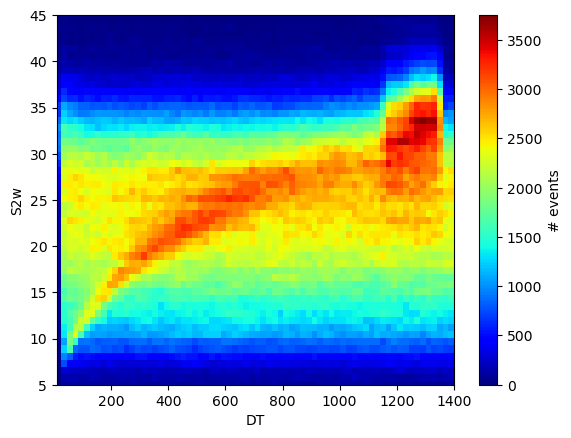

In [89]:
a=plt.hist2d(DT,s2w,bins=100,cmap='jet')
plt.colorbar(label='# events')
plt.xlabel('DT')
plt.ylabel('S2w')
plt.ylim(5,45)
plt.xlim(10,1400)

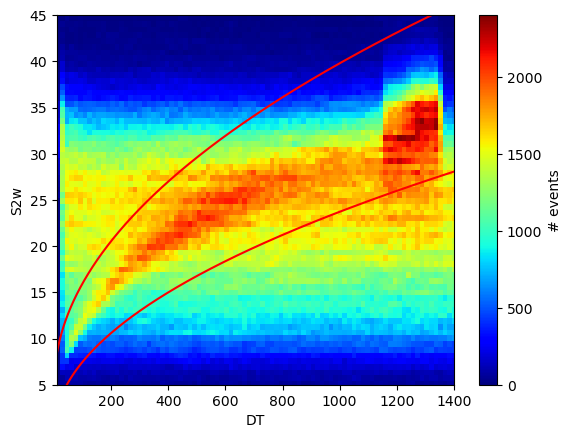

In [156]:
f= lambda x,a,b: a+b*x**0.5
f1 = lambda x: f(x,5,1.1)
f2 = lambda x: f(x,0,0.75)

a = plt.hist2d(DT, s2w, bins=125, cmap='jet')
widths=a[2]; drifts=a[1]; counts=a[0] 
plt.colorbar(label='# events')
plt.xlabel('DT')
plt.ylabel('S2w')
plt.ylim(5,45)
plt.xlim(10,1400)

x=np.linspace(0,max(DT),len(s2w))
plt.plot(x,f1(x), color='red')
plt.plot(x,f2(x), color='red')   

In [158]:
DT_filtered=[]
s2w_filtered=[]
for dt, S2 in zip(DT, s2w):
    if S2<f1(dt) and S2>f2(dt):
        DT_filtered.append(dt)
        s2w_filtered.append(S2)

(30.0, 800.0)

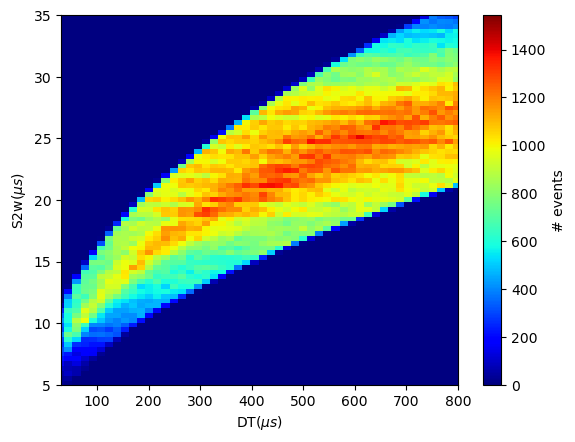

In [159]:
a=plt.hist2d(DT_filtered, s2w_filtered, bins=125, cmap='jet')
plt.colorbar(label='# events')
plt.xlabel(r'DT($\mu s$)')
plt.ylabel(r'S2w($\mu s$)')
plt.ylim(5,35)
plt.xlim(30,800)

In [83]:
DT_expected=mod.DT_predictor(s2w_filtered, DT_filtered,n_bins=80)

In [84]:
DT_expected(30)

(array(1057.58336709), array(290.16785368))

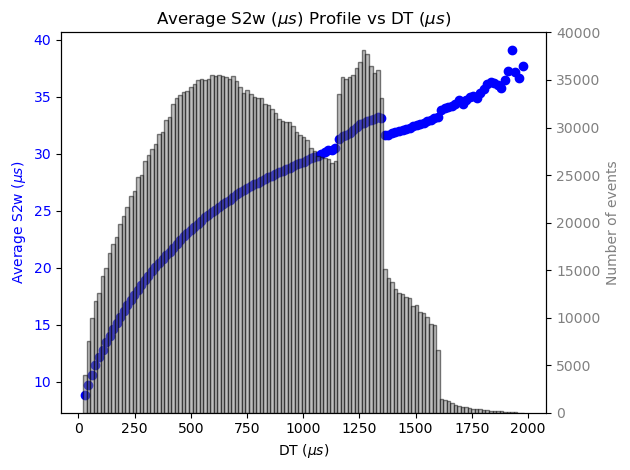

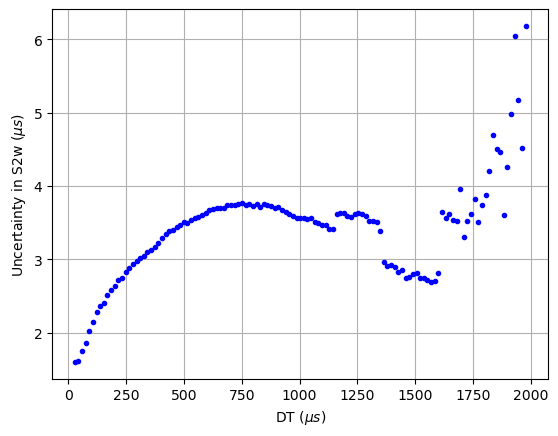

In [222]:
b=mod.profiles(DT_filtered,s2w_filtered, threshold=1, n_bins=125, y_label=r'S2w ($\mu s$)', x_label=r'DT ($\mu s$)' , plot=True)

In [224]:
cuentas_diferencia=a[0]-b[0]
bordes_diferencia_x=a[1][:-1]-b[1]
bordes_diferencia_y=a[2][:-1]-b[2]

C:\Users\pablo\AppData\Local\Temp\ipykernel_25108\2748795249.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(bordes_diferencia_x, bordes_diferencia_y, cuentas_diferencia.T, cmap='jet')


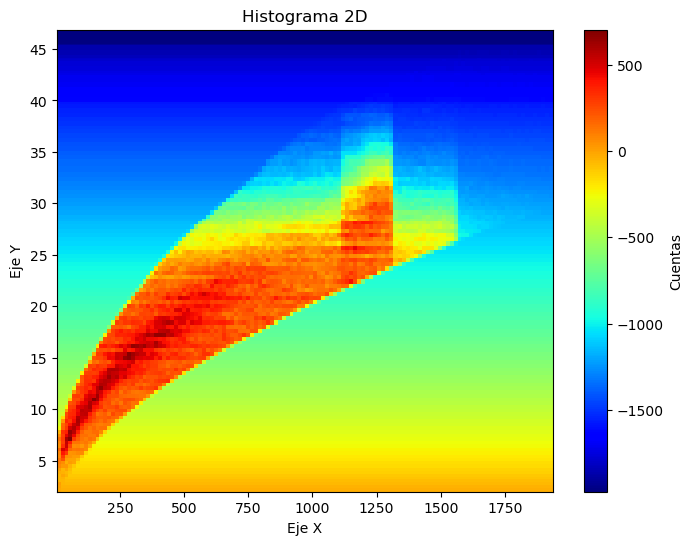

In [226]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(bordes_diferencia_x, bordes_diferencia_y, cuentas_diferencia.T, cmap='jet')  
plt.colorbar(label='Cuentas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Histograma 2D')
plt.show()

In [246]:
b[0]

array([  28.53776055,   44.24377863,   59.94979671,   75.6558148 ,
         91.36183288,  107.06785096,  122.77386904,  138.47988712,
        154.1859052 ,  169.89192329,  185.59794137,  201.30395945,
        217.00997753,  232.71599561,  248.42201369,  264.12803178,
        279.83404986,  295.54006794,  311.24608602,  326.9521041 ,
        342.65812218,  358.36414027,  374.07015835,  389.77617643,
        405.48219451,  421.18821259,  436.89423067,  452.60024876,
        468.30626684,  484.01228492,  499.718303  ,  515.42432108,
        531.13033916,  546.83635725,  562.54237533,  578.24839341,
        593.95441149,  609.66042957,  625.36644765,  641.07246574,
        656.77848382,  672.4845019 ,  688.19051998,  703.89653806,
        719.60255614,  735.30857423,  751.01459231,  766.72061039,
        782.42662847,  798.13264655,  813.83866463,  829.54468272,
        845.2507008 ,  860.95671888,  876.66273696,  892.36875504,
        908.07477312,  923.78079121,  939.48680929,  955.19282

In [228]:
profile_2D = np.tile(b[3], (a[0].shape[0], 1))

In [230]:
difference = a[0] - profile_2D

Text(0, 0.5, 'S2w (μs)')

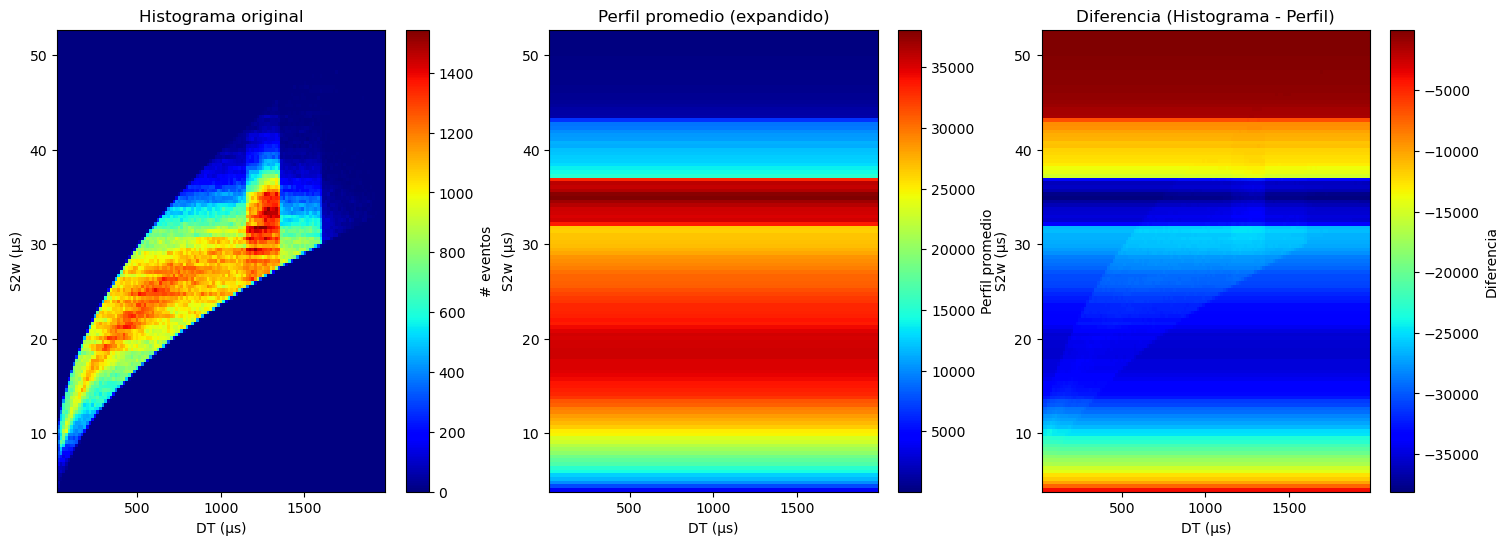

In [232]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pcolormesh(a[1], a[2], a[0].T, cmap='jet', shading='auto')
plt.colorbar(label='# eventos')
plt.title('Histograma original')
plt.xlabel('DT (μs)')
plt.ylabel('S2w (μs)')

plt.subplot(1, 3, 2)
plt.pcolormesh(a[1], a[2], profile_2D.T, cmap='jet', shading='auto')
plt.colorbar(label='Perfil promedio')
plt.title('Perfil promedio (expandido)')
plt.xlabel('DT (μs)')
plt.ylabel('S2w (μs)')

plt.subplot(1, 3, 3)
plt.pcolormesh(a[1], a[2], difference.T, cmap='jet', shading='auto')
plt.colorbar(label='Diferencia')
plt.title('Diferencia (Histograma - Perfil)')
plt.xlabel('DT (μs)')
plt.ylabel('S2w (μs)')

In [242]:
len(b[1])

125